<a href="https://colab.research.google.com/github/allyracho/DS440-Transfer-Learning-Address-Sustainability-Issues-1/blob/main/Multiple_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Dependencies

In [ ]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore") # Get rid of warnings        
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR

In [ ]:
!pip install sdv

     |████████████████████████████████| 101 kB 4.7 MB/s 
     |████████████████████████████████| 45 kB 2.6 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
     |████████████████████████████████| 52 kB 1.7 MB/s 
     |████████████████████████████████| 1.2 MB 39.8 MB/s 
     |████████████████████████████████| 97 kB 7.1 MB/s 
     |████████████████████████████████| 11.2 MB 22.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 930 kB 47.9 MB/s 
     |████████████████████████████████| 280 kB 45.6 MB/s 
     |████████████████████████████████| 636 kB 48.4 MB/s 
     |████████████████████████████████| 2.5 MB 37.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting un

In [ ]:
from sdv.tabular import GaussianCopula # Synthetic Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Functions

### Scale Data

In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_data(X_train, X_test):
    
    """
    Input: training and testing splits.
    Output: Scaled training and testing splits.
    """
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    return X_train, X_test

### Plot Loss Curves

In [ ]:
def plot_loss(history):
    """
    Loss Curves of the Models - Neural Nets
    """
    plt.plot(history.history['loss'], label = 'loss')
    #plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

    return plt

### Plot Predictions Against True Values

In [ ]:
def plot_predictions(true_values, predictions):

  """
  Plots true values in Green
  Plots predicted values in red
  """

  # Plot True Values and Predictions
  plt.figure(figsize = (10,5))
  plt.plot(np.array(true_values), c = 'green', label = "True Values")
  plt.plot(np.array(predictions), c = "red", label = "Predictions")
  plt.xlabel('Total Number of Records')
  plt.ylabel('AQI value')
  plt.legend()
  plt.show()

  return plt

## Get Data

### NYC Data

In [ ]:
nyc_data = pd.read_csv('/content/drive/MyDrive/DS-440/SQL DATA/master_1.csv')
nyc_data.head()

,year,week,new_york_city_diesel_average_gal,new_york_city_gas_average_gal,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,pm25,aqi
0,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,7464,7410,3778,15.8,3.4,15.7,3.4,35,51.666667,34.142857
1,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,72719,71484,46403,20.1,6.2,19.9,6.1,18,51.666667,34.142857
2,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,13961,12751,8389,20.4,5.4,19.0,5.3,17,51.666667,34.142857
3,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,3385,3299,1378,13.0,2.2,13.1,2.2,63,51.666667,34.142857
4,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,4377,4021,2983,23.0,5.7,21.6,5.5,128,51.666667,34.142857


### Chicago Data

In [ ]:
chicago_data = pd.read_csv('/content/drive/MyDrive/DS-440/SQL DATA/ChicagoFeatures_V2.csv')
chicago_data.head()

,Unnamed: 0,week,month,year,County,AQI_Weekly_Measurement,City,Weather_TMAX,Weather_TMIN,Weather_AWND,...,avg_weekday_rides,avg_saturday_rides,avg_sunday_holiday_rides,Pollution_pm25,Pollution_o3,traffic_taxi_trip_miles,traffic_taxi_trip_totals,traffic_rideshare_miles,traffic_speed,traffic_bus_count
0,1,1,1,2018,Cook,9.626513,Chicago,14.666667,-0.523810,10.822381,...,5747.625984,3250.553543,2213.899213,37.714286,18.714286,2.43572,12.77078,NaN,NaN,NaN
1,2,1,1,2019,Cook,9.314448,Chicago,43.571429,30.428571,9.788571,...,5215.420635,2968.976190,2214.430159,NaN,17.000000,2.41248,14.25623,NaN,NaN,NaN
2,3,1,1,2020,Cook,7.499619,Chicago,42.095238,28.238095,10.151905,...,5956.016800,3047.092800,2302.758400,22.833333,NaN,2.53537,14.34805,5.993557,NaN,NaN
3,4,1,1,2021,Cook,16.980791,Chicago,35.666667,27.428571,7.264762,...,2147.444355,1544.741935,1072.214516,49.000000,NaN,5.50142,20.96997,NaN,NaN,NaN
4,5,2,1,2018,Cook,11.899454,Chicago,35.809524,19.380952,12.282857,...,NaN,NaN,NaN,37.428571,18.857143,NaN,NaN,NaN,NaN,NaN


### Philly Data

In [ ]:
philly_data = pd.read_csv('/content/drive/MyDrive/DS-440/SQL DATA/PhillyFeatures_V2.csv')
philly_data.head()

,Unnamed: 0,week,month,year,County,City,AQI_Weekly_Measurement,Weather_TMAX,Weather_TMIN,Weather_AWND,Weather_PRCP,traffic_bike_counts,Pollution_pm25,Pollution_o3,Pollution_no2,Pollution_so2,Pollution_co,traffic_ped_counts,traffic_vehicle_counts
0,1,1,1,2018,Philadelphia,Philadelphia,9.601005,23.000000,9.142857,12.175714,0.020000,NaN,38.714286,22.714286,11.714286,NaN,1.857143,NaN,NaN
1,2,1,1,2019,Philadelphia,Philadelphia,6.767668,48.714286,35.285714,8.212857,0.082857,NaN,NaN,17.428571,11.142857,NaN,2.142857,NaN,NaN
2,3,1,1,2020,Philadelphia,Philadelphia,9.129070,49.000000,34.571429,7.350000,0.058571,NaN,NaN,18.714286,14.571429,NaN,NaN,NaN,NaN
3,4,1,1,2021,Philadelphia,Philadelphia,7.055533,44.285714,32.857143,8.307143,0.147143,230.3,25.857143,17.000000,9.142857,NaN,1.857143,4704.75,NaN
4,5,2,1,2018,Philadelphia,Philadelphia,12.543229,49.000000,27.142857,7.604286,0.211429,NaN,46.285714,21.428571,15.857143,NaN,NaN,NaN,NaN


## Preprocessing

Steps:
1. Set License Class as Categorical and then Encode it for ML models.
2. AQI is an Integer, no decimal values.
3. Train Set - Data From 2018 to 2020, Test Set - Data From 2021 only.
4. Split Train and Test Data into Features and Labels.

### NYC

In [ ]:
nyc_data.columns

Index(['year', 'week', 'new_york_city_diesel_average_gal',
       'new_york_city_gas_average_gal', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed',
       'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'License Class', 'Trips Per Day', 'Unique Drivers', 'Unique Vehicles',
       'Vehicles Per Day', 'Avg Days Vehicles on Road',
       'Avg Hours Per Day Per Vehicle', 'Avg Days Drivers on Road',
       'Avg Hours Per Day Per Driver', 'Avg Minutes Per Trip', 'pm25', 'aqi'],
      dtype='object')

In [ ]:
# Encode the License Class Column NYC
nyc_data['License Class'] = nyc_data['License Class'].astype('category').cat.codes
nyc_data['aqi'] = nyc_data['aqi'].astype(int)

# NYC Train - 2018 to 2020
nyc_train = nyc_data[nyc_data['year'] != 2021]

# NYC Test - 2020
nyc_test = nyc_data[nyc_data['year'] == 2021]

print(f"Train Data Years: {nyc_train.year.unique()}")
print(f"Test Data Years: {nyc_test.year.unique()}")

# Create Train and Test Splits NYC
nyc_X_train = nyc_train.drop(['pm25','aqi'], axis = 1)
nyc_y_train = nyc_train[['aqi']]
nyc_X_test = nyc_test.drop(['pm25','aqi'], axis = 1)
nyc_y_test = nyc_test[['aqi']]

print(f"X_train Shape: {nyc_X_train.shape}")
print(f"X_test Shape: {nyc_X_test.shape}")

Train Data Years: [2018 2019 2020]
Test Data Years: [2021]
X_train Shape: (936, 32)
X_test Shape: (318, 32)


In [ ]:
# Corr Matrix
!pip uninstall seaborn
!pip install seaborn
import seaborn as sns
corrMatrix = nyc_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


Found existing installation: seaborn 0.11.2
Uninstalling seaborn-0.11.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/seaborn-0.11.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/seaborn/*
Proceed (y/n)? y
  Successfully uninstalled seaborn-0.11.2
     |████████████████████████████████| 292 kB 6.6 MB/s 


ImportError: ignored

uy### Chicago

In [ ]:
# Drop City Indentifiers as they prevent the model to generalize over the dataset
chicago_data = chicago_data.drop(['County', 'City'], axis = 1)

In [ ]:
chicago_data = chicago_data.replace('NA', 0)
chicago_data = chicago_data.astype(float)
chicago_data = chicago_data.replace(0, np.nan)
# NA values
chicago_data.isna().sum()

Unnamed: 0                    0
week                          0
month                         0
year                          0
AQI_Weekly_Measurement       18
Weather_TMAX                  0
Weather_TMIN                  0
Weather_AWND                  0
Weather_PRCP                 12
avg_weekday_rides           203
avg_saturday_rides          203
avg_sunday_holiday_rides    203
Pollution_pm25               22
Pollution_o3                 63
traffic_taxi_trip_miles     208
traffic_taxi_trip_totals    208
traffic_rideshare_miles     211
traffic_speed               207
traffic_bus_count           207
dtype: int64

In [ ]:
print(f"Total Number Of Records: {len(chicago_data)}")

Total Number Of Records: 212


Looks like some columns have more than 75% of missing values - this renders them usless. We can remove them

In [ ]:
chicago_data = chicago_data.drop(['avg_weekday_rides', 'avg_saturday_rides', 'avg_sunday_holiday_rides',
                                 'traffic_taxi_trip_miles', 'traffic_taxi_trip_totals', 'traffic_rideshare_miles',
                                 'traffic_speed', 'traffic_bus_count'], axis = 1)
chicago_data.head()

,Unnamed: 0,week,month,year,AQI_Weekly_Measurement,Weather_TMAX,Weather_TMIN,Weather_AWND,Weather_PRCP,Pollution_pm25,Pollution_o3
0,1.0,1.0,1.0,2018.0,9.626513,14.666667,-0.523810,10.822381,0.002857,37.714286,18.714286
1,2.0,1.0,1.0,2019.0,9.314448,43.571429,30.428571,9.788571,0.060476,NaN,17.000000
2,3.0,1.0,1.0,2020.0,7.499619,42.095238,28.238095,10.151905,0.001905,22.833333,NaN
3,4.0,1.0,1.0,2021.0,16.980791,35.666667,27.428571,7.264762,0.052857,49.000000,NaN
4,5.0,2.0,1.0,2018.0,11.899454,35.809524,19.380952,12.282857,0.038571,37.428571,18.857143


In [ ]:
# The rest of the missing values can be forward filled

chicago_data = chicago_data.ffill(axis = 0) # column vice
print(f"Missing Values:\n{chicago_data.isna().sum()}")
chicago_data['year'] = chicago_data['year'].astype(int)
chicago_data['AQI_Weekly_Measurement'] = chicago_data['AQI_Weekly_Measurement'].astype(int)
chicago_data.head()

Missing Values:
Unnamed: 0                0
week                      0
month                     0
year                      0
AQI_Weekly_Measurement    0
Weather_TMAX              0
Weather_TMIN              0
Weather_AWND              0
Weather_PRCP              0
Pollution_pm25            0
Pollution_o3              0
dtype: int64


,Unnamed: 0,week,month,year,AQI_Weekly_Measurement,Weather_TMAX,Weather_TMIN,Weather_AWND,Weather_PRCP,Pollution_pm25,Pollution_o3
0,1.0,1.0,1.0,2018,9,14.666667,-0.523810,10.822381,0.002857,37.714286,18.714286
1,2.0,1.0,1.0,2019,9,43.571429,30.428571,9.788571,0.060476,37.714286,17.000000
2,3.0,1.0,1.0,2020,7,42.095238,28.238095,10.151905,0.001905,22.833333,17.000000
3,4.0,1.0,1.0,2021,16,35.666667,27.428571,7.264762,0.052857,49.000000,17.000000
4,5.0,2.0,1.0,2018,11,35.809524,19.380952,12.282857,0.038571,37.428571,18.857143


In [ ]:
# Chicago Train - 2018 to 2020
chicago_train = chicago_data[chicago_data['year'] != 2021]

# Chicago Test - 2020
chicago_test = chicago_data[chicago_data['year'] == 2021]

print(f"Train Data Years: {chicago_train.year.unique()}")
print(f"Test Data Years: {chicago_test.year.unique()}")

# Create Train and Test Splits NYC
chicago_X_train = chicago_train.drop(['Unnamed: 0', 'Pollution_pm25','AQI_Weekly_Measurement'], axis = 1)
chicago_y_train = chicago_train[['AQI_Weekly_Measurement']]
chicago_X_test = chicago_test.drop(['Unnamed: 0','Pollution_pm25','AQI_Weekly_Measurement'], axis = 1)
chicago_y_test = chicago_test[['AQI_Weekly_Measurement']]

print(f"X_train Shape: {chicago_X_train.shape}")
print(f"X_test Shape: {chicago_X_test.shape}")

Train Data Years: [2018 2019 2020]
Test Data Years: [2021]
X_train Shape: (159, 8)
X_test Shape: (53, 8)


### Philly

In [ ]:
# Drop City Indentifiers as they prevent the model to generalize over the dataset
philly_data = philly_data.drop(['County', 'City'], axis = 1)
philly_data = philly_data.replace('NA', 0)
philly_data = philly_data.astype(float)
philly_data = philly_data.replace(0, np.nan)
# NA values
philly_data.isna().sum()

Unnamed: 0                  0
week                        0
month                       0
year                        0
AQI_Weekly_Measurement     20
Weather_TMAX                0
Weather_TMIN                0
Weather_AWND                0
Weather_PRCP               12
traffic_bike_counts       167
Pollution_pm25             39
Pollution_o3               31
Pollution_no2              32
Pollution_so2             199
Pollution_co               59
traffic_ped_counts        173
traffic_vehicle_counts    183
dtype: int64

In [ ]:
print(f"Total Number of Records: {len(philly_data)}")

Total Number of Records: 212


In [ ]:
# Drop columns with almost all records missing
philly_data = philly_data.drop(['traffic_bike_counts', 'Pollution_so2', 'Pollution_pm25', 
                                'traffic_ped_counts', 'traffic_vehicle_counts'], axis = 1)
philly_data.head()

,Unnamed: 0,week,month,year,AQI_Weekly_Measurement,Weather_TMAX,Weather_TMIN,Weather_AWND,Weather_PRCP,Pollution_o3,Pollution_no2,Pollution_co
0,1.0,1.0,1.0,2018.0,9.601005,23.000000,9.142857,12.175714,0.020000,22.714286,11.714286,1.857143
1,2.0,1.0,1.0,2019.0,6.767668,48.714286,35.285714,8.212857,0.082857,17.428571,11.142857,2.142857
2,3.0,1.0,1.0,2020.0,9.129070,49.000000,34.571429,7.350000,0.058571,18.714286,14.571429,NaN
3,4.0,1.0,1.0,2021.0,7.055533,44.285714,32.857143,8.307143,0.147143,17.000000,9.142857,1.857143
4,5.0,2.0,1.0,2018.0,12.543229,49.000000,27.142857,7.604286,0.211429,21.428571,15.857143,NaN


In [ ]:
# The rest of the missing values can be forward filled

philly_data = philly_data.ffill(axis = 0) # column vice
print(f"Missing Values:\n{philly_data.isna().sum()}")
philly_data['year'] = philly_data['year'].astype(int)
philly_data['AQI_Weekly_Measurement'] = philly_data['AQI_Weekly_Measurement'].astype(int)
philly_data.head()

Missing Values:
Unnamed: 0                0
week                      0
month                     0
year                      0
AQI_Weekly_Measurement    0
Weather_TMAX              0
Weather_TMIN              0
Weather_AWND              0
Weather_PRCP              0
Pollution_o3              0
Pollution_no2             0
Pollution_co              0
dtype: int64


,Unnamed: 0,week,month,year,AQI_Weekly_Measurement,Weather_TMAX,Weather_TMIN,Weather_AWND,Weather_PRCP,Pollution_o3,Pollution_no2,Pollution_co
0,1.0,1.0,1.0,2018,9,23.000000,9.142857,12.175714,0.020000,22.714286,11.714286,1.857143
1,2.0,1.0,1.0,2019,6,48.714286,35.285714,8.212857,0.082857,17.428571,11.142857,2.142857
2,3.0,1.0,1.0,2020,9,49.000000,34.571429,7.350000,0.058571,18.714286,14.571429,2.142857
3,4.0,1.0,1.0,2021,7,44.285714,32.857143,8.307143,0.147143,17.000000,9.142857,1.857143
4,5.0,2.0,1.0,2018,12,49.000000,27.142857,7.604286,0.211429,21.428571,15.857143,1.857143


In [ ]:
# Philly Train - 2018 to 2020
philly_train = philly_data[philly_data['year'] != 2021]

# Philly Test - 2020
philly_test = philly_data[philly_data['year'] == 2021]

print(f"Train Data Years: {philly_train.year.unique()}")
print(f"Test Data Years: {philly_test.year.unique()}")

# Create Train and Test Splits NYC
philly_X_train = philly_train.drop(['Unnamed: 0','AQI_Weekly_Measurement'], axis = 1)
philly_y_train = philly_train[['AQI_Weekly_Measurement']]
philly_X_test = philly_test.drop(['Unnamed: 0','AQI_Weekly_Measurement'], axis = 1)
philly_y_test = philly_test[['AQI_Weekly_Measurement']]

print(f"X_train Shape: {philly_X_train.shape}")
print(f"X_test Shape: {philly_X_test.shape}")

Train Data Years: [2018 2019 2020]
Test Data Years: [2021]
X_train Shape: (159, 10)
X_test Shape: (53, 10)


## Source City NYC Models

In [ ]:
# Scale NYC features
scaled_nyc_X_train, scaled_nyc_X_test = scale_data(nyc_X_train, nyc_X_test)

In [ ]:
scaled_nyc_X_test

array([[ 0.        , -1.69967317, -1.94417561, ..., -0.67852387,
        -0.32614204, -0.7596654 ],
       [ 0.        , -1.69967317, -1.94417561, ...,  0.61386736,
         0.91407521, -0.87401589],
       [ 0.        , -1.69967317, -1.94417561, ...,  0.67261242,
        -0.01608772, -0.87401589],
       ...,
       [ 0.        ,  1.69967317,  1.4390368 , ..., -1.73593488,
        -1.51468357, -0.04089083],
       [ 0.        ,  1.69967317,  1.4390368 , ...,  0.14390691,
        -0.73954779,  2.06642549],
       [ 0.        ,  1.69967317,  1.4390368 , ...,  1.43629815,
         1.37915668,  1.36398672]])

### Model 1: Random Forest Regressor

In [ ]:
np.random.seed(44)
rfr = RandomForestRegressor(n_estimators=200, criterion="mse",
                            min_samples_leaf=3, min_samples_split=3, 
                            max_depth=5, random_state = 44).fit(scaled_nyc_X_train, nyc_y_train)

print(f"Random Forest Regressor Score: {rfr.score(scaled_nyc_X_test, nyc_y_test) * 100}")

Random Forest Regressor Score: -2.613066208848025


### Model 2: SVM

In [ ]:
np.random.seed(44)
regressor = SVR(kernel = 'rbf').fit(scaled_nyc_X_train, nyc_y_train)
print(f"Support Vector Machines: {regressor.score(scaled_nyc_X_test, nyc_y_test) * 100}")

Support Vector Machines: -0.16707501764643418


### Model 3: Sequential

In [ ]:
# Build Fully Connect Neural Net using Sequential API
tf.random.set_seed(44)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(500, input_dim=32, activation= "relu"))
model.add(tf.keras.layers.Dense(500, activation = "relu"))
model.add(tf.keras.layers.Dense(100, activation= "relu"))
model.add(tf.keras.layers.Dense(50, activation= "relu"))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               16500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 322,201
Trainable params: 322,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile and Fit Model
tf.random.set_seed(44)
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error", tf.keras.metrics.RootMeanSquaredError()])
history_1 = model.fit(scaled_nyc_X_train, np.array(nyc_y_train), epochs=50, verbose = 0)

In [ ]:
# Evaluate Model on Test Data
model.evaluate(scaled_nyc_X_test, np.array(nyc_y_test))

10/10 [==============================] - 0s 4ms/step - loss: 245.3239 - mean_squared_error: 245.3239 - root_mean_squared_error: 15.6628


[245.3239288330078, 245.3239288330078, 15.662819862365723]

In [ ]:
# Make Predictions
predictions = model.predict(scaled_nyc_X_test)

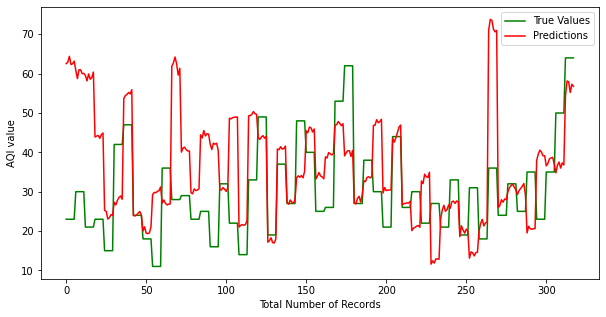

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Plot True Values and Predictions
plot_predictions(nyc_y_test, predictions)

# Model Testing, Making It Better - Trying to Atleast!

### Model Test: 1

In [ ]:
# Build Fully Connect Neural Net using Sequential API
tf.random.set_seed(44)
model_test = tf.keras.Sequential()
model_test.add(tf.keras.layers.Dense(11, input_dim=32, activation= "relu"))
model_test.add(tf.keras.layers.Dense(1, kernel_initializer="normal"))

In [ ]:
# Compile and Fit Model
tf.random.set_seed(44)
model_test.compile(loss= "mean_squared_error" , 
                   optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001, beta_1=0.9, 
                                                      beta_2=0.999, epsilon=1e-08, decay=0.0), 
                   metrics=["mean_squared_error", tf.keras.metrics.RootMeanSquaredError()])
history_test = model_test.fit(scaled_nyc_X_train, np.array(nyc_y_train), epochs=200, verbose = 0)

10/10 [==============================] - 0s 2ms/step - loss: 229.0795 - mean_squared_error: 229.0795 - root_mean_squared_error: 15.1354


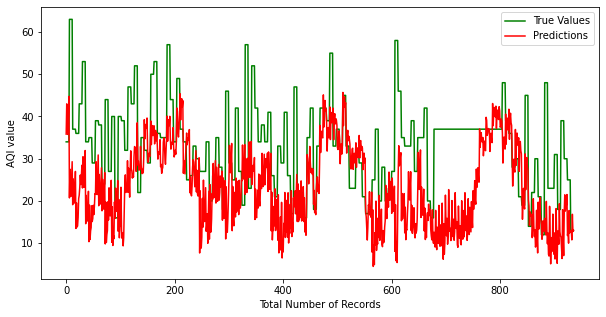

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Evaluate Model on Test Data
model_test.evaluate(scaled_nyc_X_test, np.array(nyc_y_test))
# Make Predictions
predictions_train = model_test.predict(scaled_nyc_X_train)
# Plot True Values and Predictions
plot_predictions(nyc_y_train, predictions_train)

10/10 [==============================] - 0s 2ms/step - loss: 229.0795 - mean_squared_error: 229.0795 - root_mean_squared_error: 15.1354


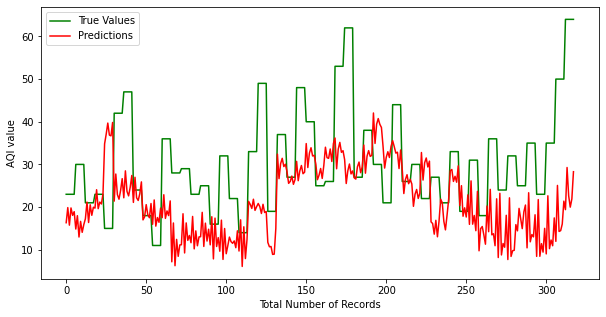

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Evaluate Model on Test Data
model_test.evaluate(scaled_nyc_X_test, np.array(nyc_y_test))
# Make Predictions
predictions_test = model_test.predict(scaled_nyc_X_test)
# Plot True Values and Predictions
plot_predictions(nyc_y_test, predictions_test)

### Model Test: 2

In [ ]:
history_test = model_test.fit(nyc_combined_X_train, np.array(nyc_combined_y_train), epochs=200, verbose = 0)

NameError: ignored

10/10 [==============================] - 0s 2ms/step - loss: 229.0795 - mean_squared_error: 229.0795 - root_mean_squared_error: 15.1354


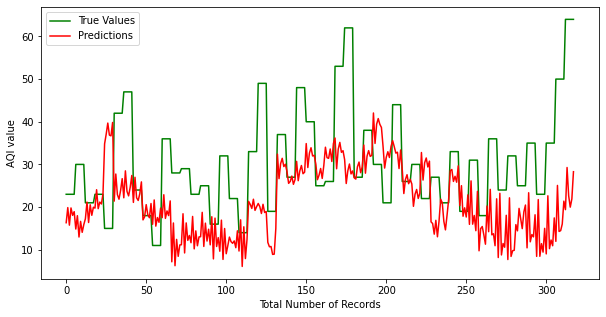

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Evaluate Model on Test Data
model_test.evaluate(scaled_nyc_X_test, np.array(nyc_y_test))
# Make Predictions
predictions_test = model_test.predict(scaled_nyc_X_test)
# Plot True Values and Predictions
plot_predictions(nyc_y_test, predictions_test)

### Normalized RMSE

In [ ]:
print(f"Max Values of Target: {max(np.array(nyc_y_test))} \nMin Value of Target: {min(np.array(nyc_y_test))}")
norm = 15.662819862365723/(max(np.array(nyc_y_test))-min(np.array(nyc_y_test)))
print(norm)

Max Values of Target: [64] 
Min Value of Target: [11]
[0.2955249]


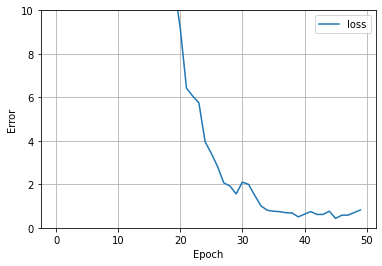

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Plot Loss Curves
plot_loss(history_1)

In [ ]:
# Save Model
model.save('/content/drive/MyDrive/DS-440/SQL DATA/Models/Model_1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DS-440/SQL DATA/Models/Model_1/assets


## Preprocess - Synthetic Data
Create Synthetic Data Using `Train` Data and Check Chi Squared Distribution and Plot the Distribution

### Chicago

In [ ]:
model_copula = GaussianCopula()
model_copula.fit(chicago_data)
# Create a Dataset with the same number or records as training data
np.random.seed(44)
chicago_sample_data = model_copula.sample(212)
chicago_sample_data.head()

,Unnamed: 0,week,month,year,AQI_Weekly_Measurement,Weather_TMAX,Weather_TMIN,Weather_AWND,Weather_PRCP,Pollution_pm25,Pollution_o3
0,101.0,19.0,6.0,2020,15,88.257950,69.649721,7.701833,0.003431,34.887505,48.604398
1,165.0,39.0,11.0,2021,9,51.348148,22.822077,8.138003,0.042902,30.889827,18.703472
2,177.0,48.0,10.0,2018,8,39.983049,31.642097,9.282388,0.066966,31.915207,18.694783
3,48.0,4.0,5.0,2018,7,58.918754,43.562680,8.344603,0.000707,30.270820,32.060267
4,98.0,25.0,6.0,2020,12,33.920335,19.519062,8.550640,0.367034,38.211948,22.740517


In [ ]:
print(f"Distribution of Data By Year Train Data:\n{chicago_data.year.value_counts()}")
print(f"Distribution of Data By Year Sample Data:\n{chicago_sample_data.year.value_counts()}")

print(f"Mean of AQI Train Data: {chicago_data.AQI_Weekly_Measurement.mean()}")
print(f"Mean of AQI Sample Data: {chicago_sample_data.AQI_Weekly_Measurement.mean()}")

Distribution of Data By Year Train Data:
2018    53
2019    53
2020    53
2021    53
Name: year, dtype: int64
Distribution of Data By Year Sample Data:
2020    63
2019    62
2018    50
2021    37
Name: year, dtype: int64
Mean of AQI Train Data: 9.377358490566039
Mean of AQI Sample Data: 9.599056603773585


In [ ]:
chicago_sample_data = chicago_sample_data.drop(['Unnamed: 0'], axis = 1)
chicago_sample_data.isna().sum()

week                      0
month                     0
year                      0
AQI_Weekly_Measurement    0
Weather_TMAX              0
Weather_TMIN              0
Weather_AWND              0
Weather_PRCP              0
Pollution_pm25            0
Pollution_o3              0
dtype: int64

In [ ]:
chicago_sample_data.to_csv('/content/drive/MyDrive/DS-440/SQL DATA/Synthetic-Data/Chicago-Sample.csv')

### Philly

In [ ]:
model_copula = GaussianCopula()
model_copula.fit(philly_data)
# Create a Dataset with the same number or records as training data
np.random.seed(44)
philly_sample_data = model_copula.sample(212)
philly_sample_data.head()

,Unnamed: 0,week,month,year,AQI_Weekly_Measurement,Weather_TMAX,Weather_TMIN,Weather_AWND,Weather_PRCP,Pollution_o3,Pollution_no2,Pollution_co
0,83.0,25.0,8.0,2020,6,89.151571,67.589132,9.393265,0.020982,45.428324,3.768661,5.601645
1,119.0,35.0,8.0,2019,10,83.594189,66.750348,5.087559,0.094066,44.191721,7.360456,1.343146
2,60.0,11.0,5.0,2020,9,86.852407,67.310978,7.061109,0.159717,37.865182,5.866266,2.312329
3,211.0,53.0,12.0,2019,9,52.861545,31.415066,5.953514,0.048560,20.379987,20.285714,5.253596
4,4.0,2.0,1.0,2018,5,49.212195,36.031491,11.897366,0.162340,24.195219,8.139924,1.449207


In [ ]:
print(f"Distribution of Data By Year Train Data:\n{philly_data.year.value_counts()}")
print(f"Distribution of Data By Year Sample Data:\n{philly_sample_data.year.value_counts()}")

print(f"Mean of AQI Train Data: {philly_data.AQI_Weekly_Measurement.mean()}")
print(f"Mean of AQI Sample Data: {philly_sample_data.AQI_Weekly_Measurement.mean()}")

Distribution of Data By Year Train Data:
2018    53
2019    53
2020    53
2021    53
Name: year, dtype: int64
Distribution of Data By Year Sample Data:
2020    69
2019    68
2021    38
2018    37
Name: year, dtype: int64
Mean of AQI Train Data: 8.160377358490566
Mean of AQI Sample Data: 8.29245283018868


In [ ]:
philly_sample_data = philly_sample_data.drop(['Unnamed: 0'], axis = 1)
philly_sample_data.isna().sum()

week                      0
month                     0
year                      0
AQI_Weekly_Measurement    0
Weather_TMAX              0
Weather_TMIN              0
Weather_AWND              0
Weather_PRCP              0
Pollution_o3              0
Pollution_no2             0
Pollution_co              0
dtype: int64

In [ ]:
philly_sample_data.to_csv('/content/drive/MyDrive/DS-440/SQL DATA/Synthetic-Data/Philly-Sample.csv')

### NYC

In [ ]:
# SDV 
model_copula = GaussianCopula()
model_copula.fit(nyc_train)

In [ ]:
# Create a Dataset with the same number or records as training data
np.random.seed(44)
sample_data = model_copula.sample(936)
sample_data.head()

,year,week,new_york_city_diesel_average_gal,new_york_city_gas_average_gal,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,pm25,aqi
0,2020,46,3.45,2.726,69.960034,55.774587,63.915108,70.442034,54.320056,63.284316,...,715,355,177,15.5,2.0,17.6,3.3,187,18.100924,13
1,2019,48,3.36,2.441,61.785180,43.772211,53.911049,57.322857,39.137610,50.368283,...,1506,499,433,27.5,8.1,22.3,7.9,187,43.480363,36
2,2020,1,3.02,2.475,35.695040,34.007668,28.506176,31.862322,27.913894,22.886501,...,3415,2772,1756,19.9,6.9,16.1,5.8,37,30.555379,28
3,2019,6,3.30,2.413,58.365471,35.308292,52.382384,55.322816,27.846368,47.561624,...,7555,8393,5614,20.1,6.5,17.6,7.0,69,55.818694,40
4,2019,6,3.45,2.722,43.931912,25.746843,38.472768,39.386095,15.951711,32.226391,...,21811,23387,20021,20.5,5.4,22.3,6.7,53,39.798312,34


In [ ]:
nyc_train.head()

,year,week,new_york_city_diesel_average_gal,new_york_city_gas_average_gal,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,pm25,aqi
0,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,7464,7410,3778,15.8,3.4,15.7,3.4,35,51.666667,34
1,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,72719,71484,46403,20.1,6.2,19.9,6.1,18,51.666667,34
2,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,13961,12751,8389,20.4,5.4,19.0,5.3,17,51.666667,34
3,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,3385,3299,1378,13.0,2.2,13.1,2.2,63,51.666667,34
4,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,4377,4021,2983,23.0,5.7,21.6,5.5,128,51.666667,34


### NYC EDA

In [ ]:
print(f"Distribution of Data By Year Train Data:\n{nyc_train.year.value_counts()}")
print(f"Distribution of Data By Year Sample Data:\n{sample_data.year.value_counts()}")

print(f"Mean of AQI Train Data: {nyc_train.aqi.mean()}")
print(f"Mean of AQI Sample Data: {sample_data.aqi.mean()}")

Distribution of Data By Year Train Data:
2018    318
2020    318
2019    300
Name: year, dtype: int64
Distribution of Data By Year Sample Data:
2019    482
2018    228
2020    226
Name: year, dtype: int64
Mean of AQI Train Data: 33.35897435897436
Mean of AQI Sample Data: 33.19337606837607


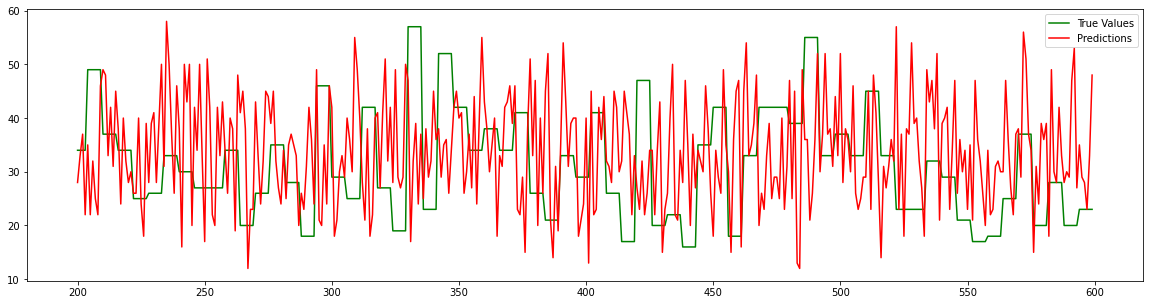

In [ ]:
# Plot NYC Train AQI and Sample Data AQI
plt.figure(figsize = (20,5))
plt.plot(nyc_train.aqi[200:600], c = 'green', label = "True Values")
plt.plot(sample_data.aqi[200:600], c = "red", label = "Predictions")
plt.legend()
plt.show()

In [ ]:
# Kolmogorov-Smirnov and Chi-Squared tests to compare train and sample data
from sdv.evaluation import evaluate
evaluate(sample_data, nyc_train, metrics = ['CSTest', 'KSTest'], aggregate = False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,CSTest,Chi-Squared,NaN,NaN,0.0,1.0,MAXIMIZE,"Cannot find fields of types ('boolean', 'categ..."
1,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.894262,0.894262,0.0,1.0,MAXIMIZE,None


### Model - Test Synthetic Data
1. Create X and Y sets from Sample Data
2. Use the saved model to evalute the sample data

In [ ]:
# Scale Data
nyc_sample_X_train = sample_data.drop(['pm25','aqi'], axis = 1)
nyc_sample_y_train = sample_data[['aqi']]
nyc_sample_X_train = StandardScaler().fit_transform(nyc_sample_X_train)

In [ ]:
# Evaluate Data
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/DS-440/SQL DATA/Models/Model_1')

In [ ]:
loaded_model.evaluate(nyc_sample_X_train, np.array(nyc_sample_y_train))

30/30 [==============================] - 0s 4ms/step - loss: 173.5330 - mean_squared_error: 173.5330 - root_mean_squared_error: 13.1732


[173.532958984375, 173.532958984375, 13.17319107055664]

The RMSE is very comparable to training data RMSE

#### Normalized RMSE

In [ ]:
print(f"Max Values of Target: {max(np.array(nyc_sample_y_train))} \nMin Value of Target: {min(np.array(nyc_sample_y_train))}")
norm = 13.17319107055664/(max(np.array(nyc_sample_y_train))-min(np.array(nyc_sample_y_train)))
print(norm)

Max Values of Target: [61] 
Min Value of Target: [12]
[0.26884063]


#### Combine Datasets and Model and Evaluate on Test Data

In [ ]:
nyc_combined_train = pd.concat([nyc_train, sample_data])
print(f"Length of Training Data: {len(nyc_combined_train)}")

# Shuffle Data
nyc_combined_train = nyc_combined_train.sample(frac=1).reset_index(drop=True)

Length of Training Data: 1872


In [ ]:
# Split and Scale Data
nyc_combined_X_train = nyc_combined_train.drop(['pm25','aqi'], axis = 1)
nyc_combined_y_train = nyc_combined_train[['aqi']]
nyc_combined_X_train = StandardScaler().fit_transform(nyc_combined_X_train)

In [ ]:
# Compile and Fit Model
tf.random.set_seed(44)
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error", tf.keras.metrics.RootMeanSquaredError()])
history_2 = model.fit(nyc_combined_X_train, np.array(nyc_combined_y_train), epochs=50, verbose = 0)

In [ ]:
# Evaluate Model
model.evaluate(scaled_nyc_X_test, np.array(nyc_y_test))

10/10 [==============================] - 0s 3ms/step - loss: 145.4175 - mean_squared_error: 145.4175 - root_mean_squared_error: 12.0589


[145.41749572753906, 145.41749572753906, 12.058917999267578]

In [ ]:
predictions_2 = model.predict(scaled_nyc_X_test)

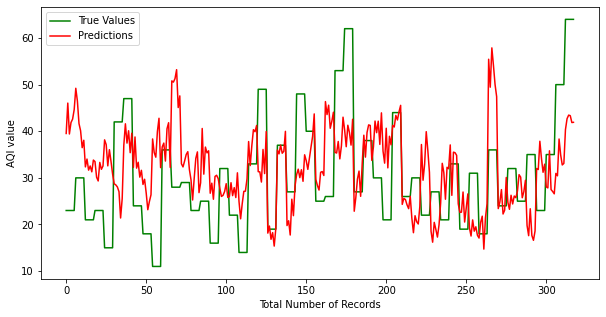

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Plot True Values and Predictions
plot_predictions(nyc_y_test, predictions_2)

In [ ]:
#### Normalized RMSE
print(f"Max Values of Target: {max(np.array(nyc_y_test))} \nMin Value of Target: {min(np.array(nyc_y_test))}")
norm = 12.058917999267578/(max(np.array(nyc_y_test))-min(np.array(nyc_y_test)))
print(norm)

Max Values of Target: [64] 
Min Value of Target: [11]
[0.22752675]


In [ ]:
# Save Model
model.save('/content/drive/MyDrive/DS-440/SQL DATA/Models/Model_2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DS-440/SQL DATA/Models/Model_2/assets


### Model 4: Sequential From Model 3

In [ ]:
# Build Fully Connect Neural Net using Functional API
tf.random.set_seed(44)
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(500, input_dim=32, activation= "relu"))
model_4.add(tf.keras.layers.Dense(500, activation = "relu"))
model_4.add(tf.keras.layers.Dense(500, activation = "relu"))
model_4.add(tf.keras.layers.Dense(250, activation= "relu"))
model_4.add(tf.keras.layers.Dense(250, activation= "relu"))
model_4.add(tf.keras.layers.Dense(100, activation= "relu"))
model_4.add(tf.keras.layers.Dense(100, activation= "relu"))
model_4.add(tf.keras.layers.Dense(50, activation= "relu"))
model_4.add(tf.keras.layers.Dense(1))    

In [ ]:
model_4.compile(loss= "mean_squared_error", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), 
                metrics=["mean_squared_error", tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
history_4 = model_4.fit(nyc_combined_X_train, np.array(nyc_combined_y_train), epochs=50, verbose = 0)

In [ ]:
model_4.evaluate(scaled_nyc_X_test, np.array(nyc_y_test))

10/10 [==============================] - 0s 4ms/step - loss: 128.8944 - mean_squared_error: 128.8944 - root_mean_squared_error: 11.3532


[128.89442443847656, 128.89442443847656, 11.353168487548828]

In [ ]:
predictions_4 = model_4.predict(scaled_nyc_X_test)

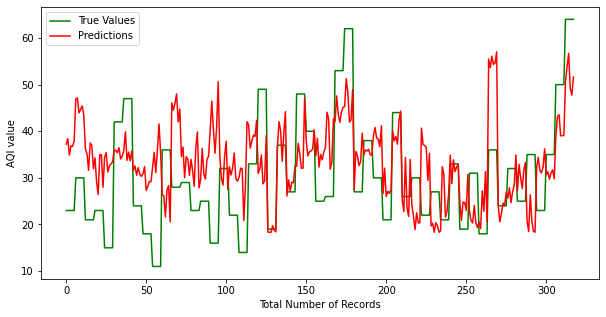

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Plot True Values and Predictions
plot_predictions(nyc_y_test, predictions_4)

#### Normalized RMSE

In [ ]:
print(f"Max Values of Target: {max(np.array(nyc_y_test))} \nMin Value of Target: {min(np.array(nyc_y_test))}")
norm = 11.16257381439209/(max(np.array(nyc_y_test))-min(np.array(nyc_y_test)))
print(norm)

Max Values of Target: [64] 
Min Value of Target: [11]
[0.2106146]


In [ ]:
model_4.save('/content/drive/MyDrive/DS-440/SQL DATA/Models/Model_4')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DS-440/SQL DATA/Models/Model_4/assets


## Transfer Model

Model Build Using Layers From Model 4 - best model so far

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class SourceCityNet(tf.keras.Model):

    def __init__(self, num_classes=1):
        super(SourceCityNet, self).__init__()
        self.block_1 = layers.Dense(500, activation = "relu")
        self.block_2 = layers.Dense(500, activation = "relu")
        self.block_3 = layers.Dense(500, activation = "relu")
        self.block_4 = layers.Dense(250, activation = "relu")
        self.block_5 = layers.Dense(250, activation = "relu")
        self.block_6 = layers.Dense(100, activation = "relu")
        self.block_7 = layers.Dense(100, activation = "relu")
        self.block_8 = layers.Dense(50, activation = "relu")
        self.regressor = layers.Dense(num_classes)

    def call(self, inputs):
        tf.random.set_seed(44)
        x = self.block_1(inputs)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.block_4(x)
        x = self.block_5(x)
        x = self.block_6(x)
        x = self.block_7(x)
        x = self.block_8(x)
        return self.regressor(x)

### Fit and Evaluate Model

In [ ]:
model_city = SourceCityNet()
model_city.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), 
                   metrics = ['mean_squared_error',tf.keras.metrics.RootMeanSquaredError()])
history_5 = model_city.fit(nyc_combined_X_train, np.array(nyc_combined_y_train), epochs=200, verbose = 0, batch_size = 8)
model_city.evaluate(scaled_nyc_X_test, np.array(nyc_y_test))

10/10 [==============================] - 0s 4ms/step - loss: 113.7140 - mean_squared_error: 113.7140 - root_mean_squared_error: 10.6637


[113.71403503417969, 113.71403503417969, 10.663678169250488]

### Plot Predictions

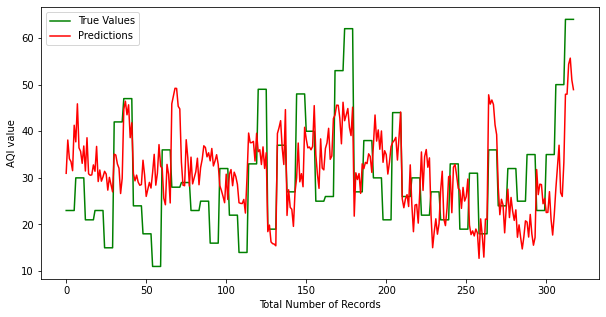

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Plot True Values and Predictions
plot_predictions(nyc_y_test, model_city.predict(scaled_nyc_X_test))

### Normalized RMSE

In [ ]:
print(f"Max Values of Target: {max(np.array(nyc_y_test))} \nMin Value of Target: {min(np.array(nyc_y_test))}")
norm = 10.663678169250488/(max(np.array(nyc_y_test))-min(np.array(nyc_y_test)))
print(norm)

Max Values of Target: [64] 
Min Value of Target: [11]
[0.20120147]


In [ ]:
model_city.save('/content/drive/MyDrive/DS-440/SQL DATA/Models/SourceCityNet')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DS-440/SQL DATA/Models/SourceCityNet/assets


In [ ]:
model_city.save_weights('/content/drive/MyDrive/DS-440/SQL DATA/Models/SourceCityNetWEIGHTS.h5')

## Transfer Model to Chicago

### Scale Data Chicago

In [ ]:
# Number of Columns in Chicago Data
len(chicago_X_train.columns)

8

In [ ]:
scaled_chicago_X_train, scaled_chicago_X_test = scale_data(
chicago_X_train, chicago_X_test)

### Transfer Knowledge

In [ ]:
# Load Model
Loaded_SourceCityNet = tf.keras.models.load_model('/content/drive/MyDrive/DS-440/SQL DATA/Models/SourceCityNet')

In [ ]:
# Create Model Using Functional API
base_model = SourceCityNet()
base_model.trainable = True

# Input Shape
input_shape = (8,)

# Input layer for different number of features
inputs = layers.Input(shape=input_shape, name="input_layer")

x = base_model(inputs, training=False) # set base_model to inference mode only

# Put together the base model and input layer
model_chicago = tf.keras.Model(inputs, x)


# Compile the model
model_chicago.compile(loss="mean_squared_error",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics=["mean_squared_error", tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model_chicago.load_weights('/content/drive/MyDrive/DS-440/SQL DATA/Models/SourceCityNet')

In [ ]:
# Check the layers in the base model and see what dtype policy they're using
for layer in model_chicago.layers[1].layers[:100]: # check only the first 20 layers to save space
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

dense_25 True float32 <Policy "float32">
dense_26 True float32 <Policy "float32">
dense_27 True float32 <Policy "float32">
dense_28 True float32 <Policy "float32">
dense_29 True float32 <Policy "float32">
dense_30 True float32 <Policy "float32">
dense_31 True float32 <Policy "float32">
dense_32 True float32 <Policy "float32">
dense_33 True float32 <Policy "float32">


In [ ]:
history_chicago = model_chicago.fit(scaled_chicago_X_train, 
                                    np.array(chicago_y_train),
                                    epochs=100, verbose = 0, batch_size = 8)

In [ ]:
model_chicago.evaluate(scaled_chicago_X_test, np.array(chicago_y_test))

2/2 [==============================] - 0s 9ms/step - loss: 11.9055 - mean_squared_error: 11.9055 - root_mean_squared_error: 3.4504


[11.90546703338623, 11.90546703338623, 3.450429916381836]

### Plot Predictions

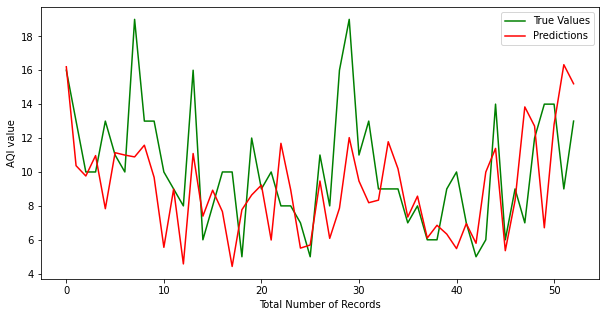

(<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>,)

In [ ]:
# Plot True Values and Predictions
plot_predictions(chicago_y_test, model_chicago.predict(scaled_chicago_X_test)),

### Normalized RMSE

In [ ]:
print(f"Max Values of Target: {max(np.array(chicago_y_test))} \nMin Value of Target: {min(np.array(chicago_y_test))}")
norm = 3.455544948577881/(max(np.array(chicago_y_test))-min(np.array(chicago_y_test)))
print(norm)

Max Values of Target: [19] 
Min Value of Target: [5]
[0.24682464]


### Save Chicago Model

In [ ]:
model_chicago.save('/content/drive/MyDrive/DS-440/SQL DATA/Models/Chicago_Model_V1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DS-440/SQL DATA/Models/Chicago_Model_V1/assets


### Run Chicago model with synthethic data

Download file and split features from AQI values

In [ ]:
chi_sample_data = pd.read_csv('/content/drive/MyDrive/DS-440/SQL DATA/Synthetic-Data/Chicago-Sample.csv')
chi_features = chi_sample_data.drop(['Unnamed: 0', 'Pollution_pm25','AQI_Weekly_Measurement'], axis = 1)

chi_aqi = chi_sample_data['AQI_Weekly_Measurement']
chi_features, chi_aqi = scale_data(chi_features, chi_aqi)

Run model on data and save predictions


In [ ]:
chi_pred = model_chicago.predict(chi_features)
prediction = pd.DataFrame(chi_pred, columns=['predictions']).to_csv('/content/drive/MyDrive/DS-440/SQL DATA/Models/chi_prediction.csv')

create real/prediction value plots for each year 

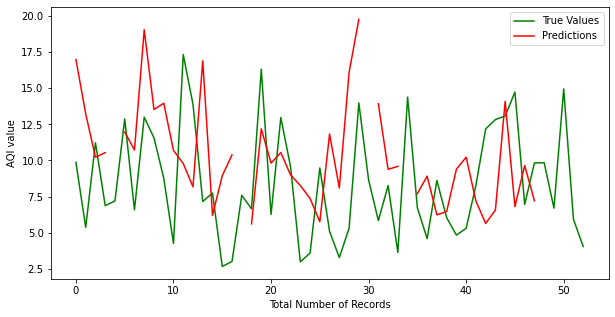

In [ ]:
real_pred = pd.read_csv('/content/drive/MyDrive/DS-440/SQL DATA/Synthetic-Data/chi_actual_pred.csv') #actual and predicted values were combined into one dataset in R and imported to drive
chi = real_pred[['AQI_Weekly_Measurement', 'predictions', 'year']]
chi = chi.loc[chi['year']== 2021] #enter years 2018 - 2021
chi_real = chi['AQI_Weekly_Measurement']
chi_pred = chi['predictions']
chi_plot = plot_predictions(chi_pred, chi_real)

## Transfer Model to Philadelphia

### Scale Philly Data

In [ ]:
# Number of Columns in Philly Data
len(philly_X_train.columns)

10

In [ ]:
philly_X_train.head()

,week,month,year,Weather_TMAX,Weather_TMIN,Weather_AWND,Weather_PRCP,Pollution_o3,Pollution_no2,Pollution_co
0,1.0,1.0,2018,23.000000,9.142857,12.175714,0.020000,22.714286,11.714286,1.857143
1,1.0,1.0,2019,48.714286,35.285714,8.212857,0.082857,17.428571,11.142857,2.142857
2,1.0,1.0,2020,49.000000,34.571429,7.350000,0.058571,18.714286,14.571429,2.142857
4,2.0,1.0,2018,49.000000,27.142857,7.604286,0.211429,21.428571,15.857143,1.857143
5,2.0,1.0,2019,39.428571,27.428571,10.001429,0.047143,19.571429,11.714286,2.714286


In [ ]:
# Scale Data
scaled_philly_X_train, scaled_philly_X_test = scale_data(
philly_X_train, philly_X_test)

### Transfer Knowledge

In [ ]:
# Create Model Using Functional API
base_model = SourceCityNet()
base_model.trainable = True

# Input Shape
input_shape = (10,)

# Input layer for different number of features
inputs = layers.Input(shape=input_shape, name="input_layer")

x = base_model(inputs, training=False) # set base_model to inference mode only

# Put together the base model and input layer
model_philly = tf.keras.Model(inputs, x)


# Compile the model
model_philly.compile(loss="mean_squared_error",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics=["mean_squared_error", tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model_philly.load_weights('/content/drive/MyDrive/DS-440/SQL DATA/Models/SourceCityNet')

In [ ]:
history_philly = model_philly.fit(scaled_philly_X_train, 
                                    np.array(philly_y_train),
                                    epochs=100, verbose = 0, batch_size = 8)

In [ ]:
model_philly.evaluate(scaled_philly_X_test, np.array(philly_y_test))

2/2 [==============================] - 0s 9ms/step - loss: 14.2591 - mean_squared_error: 14.2591 - root_mean_squared_error: 3.7761


[14.25909423828125, 14.25909423828125, 3.7761216163635254]

### Plot Predictions

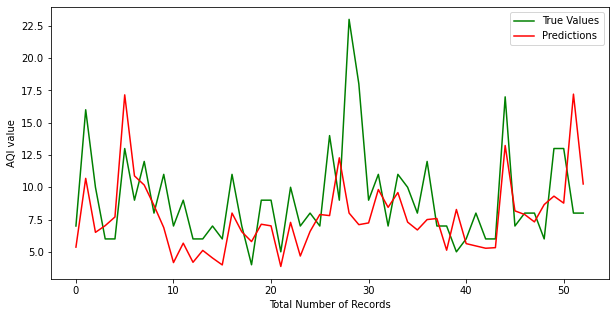

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Plot True Values and Predictions
plot_predictions(philly_y_test, model_philly.predict(scaled_philly_X_test))

### Normalized RMSE

In [ ]:
print(f"Max Values of Target: {max(np.array(philly_y_test))} \nMin Value of Target: {min(np.array(philly_y_test))}")
norm = 3.8052656650543213/(max(np.array(philly_y_test))-min(np.array(philly_y_test)))
print(norm)

Max Values of Target: [23] 
Min Value of Target: [4]
[0.20027714]


### Save Philly Model

In [ ]:
model_philly.save('/content/drive/MyDrive/DS-440/SQL DATA/Models/Philly_Model_V1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DS-440/SQL DATA/Models/Philly_Model_V1/assets


### Run Philly model with synthethic data

Download file and split features from AQI values

In [ ]:
phl_sample_data = pd.read_csv('/content/drive/MyDrive/DS-440/SQL DATA/Synthetic-Data/Philly-Sample.csv')
phl_features = phl_sample_data.drop(['Unnamed: 0','AQI_Weekly_Measurement'], axis = 1)
phl_aqi = phl_sample_data['AQI_Weekly_Measurement']
phl_features, phl_aqi = scale_data(phl_features, phl_aqi)

Run model on data and save predictions

In [ ]:
phl_pred = model_philly.predict(phl_features)
prediction = pd.DataFrame(phl_pred, columns=['predictions']).to_csv('/content/drive/MyDrive/DS-440/SQL DATA/Models/phl_prediction.csv')


create real/predicted plot for all years

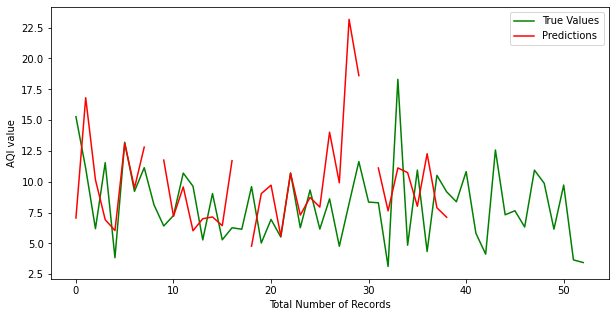

In [ ]:
real_pred = pd.read_csv('/content/drive/MyDrive/DS-440/SQL DATA/Synthetic-Data/phl_actual_pred.csv') #combined predicted and actual values on R into one dataset and imported to drive
phl = real_pred[['AQI_Weekly_Measurement', 'predictions', 'year']]
phl = phl.loc[phl['year']== 2021] #change year 2018 - 2021
phl_real = phl['AQI_Weekly_Measurement']
phl_pred = phl['predictions']
phl_year = plot_predictions(phl_pred, phl_real)

## Transfer Model to Hazelton

### Get Data

In [ ]:
haze_data = pd.read_csv('/content/drive/MyDrive/DS-440/SQL DATA/HazeltonFeatures.csv')
haze_data.head()

,Unnamed: 0,week,month,year,Weather_PRCP,DLY_TRK_VMT,DLY_VMT,WKDY_TRK_CUR,CUR_AADT,ADTT_CUR,city,county
0,1,1,1,2018,NaN,NaN,NaN,NaN,NaN,NaN,Hazleton,Luzerne
1,2,1,1,2019,NaN,NaN,NaN,NaN,NaN,NaN,Hazleton,Luzerne
2,3,1,1,2020,NaN,NaN,NaN,NaN,NaN,NaN,Hazleton,Luzerne
3,4,1,1,2021,NaN,NaN,NaN,NaN,NaN,NaN,Hazleton,Luzerne
4,5,2,1,2018,NaN,NaN,NaN,NaN,NaN,NaN,Hazleton,Luzerne


### Preprocess Data

In [ ]:
haze_data = haze_data.drop(['Unnamed: 0'], axis = 1)
haze_data.head()

,week,month,year,Weather_PRCP,DLY_TRK_VMT,DLY_VMT,WKDY_TRK_CUR,CUR_AADT,ADTT_CUR,city,county
0,1,1,2018,NaN,NaN,NaN,NaN,NaN,NaN,Hazleton,Luzerne
1,1,1,2019,NaN,NaN,NaN,NaN,NaN,NaN,Hazleton,Luzerne
2,1,1,2020,NaN,NaN,NaN,NaN,NaN,NaN,Hazleton,Luzerne
3,1,1,2021,NaN,NaN,NaN,NaN,NaN,NaN,Hazleton,Luzerne
4,2,1,2018,NaN,NaN,NaN,NaN,NaN,NaN,Hazleton,Luzerne


In [ ]:
print(f"Total Number of Hazelton Records: {len(haze_data)}")
haze_data.isna().sum()

Total Number of Hazelton Records: 212


week              0
month             0
year              0
Weather_PRCP    168
DLY_TRK_VMT     149
DLY_VMT         149
WKDY_TRK_CUR    149
CUR_AADT        149
ADTT_CUR        149
city              0
county            0
dtype: int64

Given that there are so many missing values in some of the dataset, it makes sense to drop those columns along with `city ` and `county`

In [ ]:
haze_data = haze_data.drop(['city', 'county', 'Weather_PRCP', 'DLY_TRK_VMT',
                            'DLY_VMT', 'WKDY_TRK_CUR', 'CUR_AADT', 'ADTT_CUR'], axis = 1)
print(f"Total Number of Hazelton Records: {len(haze_data)}")
haze_data.isna().sum()

Total Number of Hazelton Records: 212


week     0
month    0
year     0
dtype: int64

### Transfer Knowledge

In [ ]:
haze_data.head()

,week,month,year
0,1,1,2018
1,1,1,2019
2,1,1,2020
3,1,1,2021
4,2,1,2018
